<a href="https://colab.research.google.com/github/snxly/colab/blob/master/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [28]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = torch.accelerator.current_accelerator() if torch.accelerator.is_available() else 'cpu'
print(device)


2.8.0+cu126
cpu


## 1. What are 3 areas in industry where computer vision is currently being used?

In [ ]:
# 1. classification
# 2. object detection
# 3. category detection

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [ ]:
# The model matches perfect on training set of data, but not so good on testing set of data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [ ]:
# regularization like dropout
# change a model
# more data

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [29]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(root='MNIST', train=True, transform=ToTensor(), download=True, target_transform=None)
test_data = datasets.MNIST(root='MNIST', train=False, transform=ToTensor(), download=True, target_transform=None)

print(len(train_data), len(test_data))

60000 10000


## 6. Visualize at least 5 different samples of the MNIST training dataset.

torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 0
torch.Size([1, 28, 28]) 4
torch.Size([1, 28, 28]) 1
torch.Size([1, 28, 28]) 9


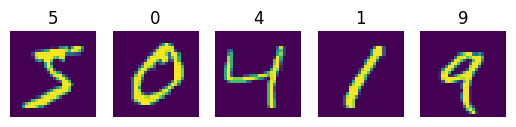

In [30]:
import matplotlib.pyplot as plt

for i in range(5):
  plt.subplot(1,5,i+1)
  image, label = train_data[i]
  print(image.shape, label)
  plt.imshow(image.squeeze())
  plt.title(label)
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [31]:
from torch.utils.data import DataLoader
batch_size = 32

train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

print(len(train_loader), len(test_loader))


1875 313


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [32]:
from torch import nn

num_in = 1
num_hidden = 10
num_out = 10

class MyMNISTCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=num_in, out_channels=num_hidden, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=num_hidden, out_channels=num_hidden, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=num_hidden, out_channels=num_hidden, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=num_hidden, out_channels=num_hidden, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.classify = nn.Sequential(
        # fix
        nn.Flatten(),
        # The output of the convolutional layers needs to be flattened before passing to the linear layer.
        # The calculation for the input features to the linear layer is based on the output size of the last pooling layer.
        # For MNIST (28x28), we keep the size in convnet layer, with kernel=3, stride=1, padding=1, and
        # after two max pooling layers with kernel_size=2 and stride=2, the spatial dimensions become (28/2)/2 = 7x7.
        # With num_hidden channels, the input features to the linear layer will be num_hidden * 7 * 7.
        nn.Linear(in_features=num_hidden * 7 * 7, out_features=num_out)
    )

  def forward(self, x):
    x = self.block_1(x)
    x = self.block_2(x)
    # Flatten the output of the convolutional layers
    x = x.view(x.size(0), -1) # Reshape to (batch_size, num_hidden * 7 * 7)
    x = self.classify(x)
    return x

model = MyMNISTCNN()
print(model.parameters)

<bound method Module.parameters of MyMNISTCNN(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classify): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)>


## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [33]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

def train_step(model, dataset, loss_fn, optimizer):
  model.train()
  batch_size = len(dataset)
  for batch, (X, y) in enumerate(dataset):
    logits = model(X)
    loss = loss_fn(logits, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 100 == 0:
      print(f'batch {batch} / {batch_size}, train_loss = {loss}')


epochs = 5
# epochs
for epoch in range(epochs):
  print(f'Epoch {epoch + 1}')
  train_step(model, train_loader, loss_fn, optimizer)



Epoch 1
batch 0 / 1875, train_loss = 2.3028745651245117
batch 100 / 1875, train_loss = 0.20791170001029968
batch 200 / 1875, train_loss = 0.06334062665700912
batch 300 / 1875, train_loss = 0.20199784636497498
batch 400 / 1875, train_loss = 0.13665607571601868
batch 500 / 1875, train_loss = 0.08315019309520721
batch 600 / 1875, train_loss = 0.026693684980273247
batch 700 / 1875, train_loss = 0.1258234977722168
batch 800 / 1875, train_loss = 0.09107748419046402


KeyboardInterrupt: 

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [38]:
model.eval()
with torch.inference_mode():
  X, y = next(iter(test_loader))
  # print(X.shape, y.shape)
  logits = model(X)
  pred = torch.softmax(logits, dim=1).argmax(dim=1)
  print(pred)
  print(y)


tensor([7, 2, 1, 0, 4, 1, 4, 4, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1])
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1])


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?